## 1. Import the dataset

In [1]:
import pandas as pd
import numpy as np
import io
from google.colab import files

#data uploaded
uploaded = files.upload()
climate = pd.read_csv('ClimateChangeDataset.csv')
socialJustice = pd.read_csv('SocialJusticeDataset.csv')
technology = pd.read_csv('TechnologyImpactDataset.csv')
biodiversity = pd.read_csv('BiodiversityConservationDataset.csv')
space = pd.read_csv('SpaceExplorationDataset.csv')

Saving BiodiversityConservationDataset.csv to BiodiversityConservationDataset (4).csv
Saving ClimateChangeDataset.csv to ClimateChangeDataset (4).csv
Saving SocialJusticeDataset.csv to SocialJusticeDataset (4).csv
Saving SpaceExplorationDataset.csv to SpaceExplorationDataset (4).csv
Saving TechnologyImpactDataset.csv to TechnologyImpactDataset (4).csv


In [2]:
climate.head()

,sentence,sentiment
0,Climate change poses a grave threat to the pla...,positive
1,Skeptics argue that the science behind climate...,negative
2,Renewable energy sources offer hope for mitiga...,positive
3,"Despite efforts to reduce carbon emissions, th...",negative
4,The urgency of addressing climate change canno...,positive


In [3]:
socialJustice.head()

,sentence,sentiment
0,Social justice requires addressing systemic in...,positive
1,Racial discrimination in policing and criminal...,negative
2,Equal access to education is essential for bre...,positive
3,Gender-based violence and discrimination are p...,negative
4,"Immigrant rights are human rights, and policie...",positive


In [4]:
technology.head()

,sentence,sentiment
0,The rapid advancement of technology has transf...,positive
1,Privacy concerns have escalated with the wides...,negative
2,Big tech companies wield enormous power and in...,negative
3,Digital literacy is essential for navigating t...,positive
4,Emerging technologies such as artificial intel...,positive


In [5]:
biodiversity.head()

,sentence,sentiment
0,Protecting biodiversity is crucial for maintai...,positive
1,Deforestation and habitat destruction threaten...,negative
2,Conservation efforts should prioritize endange...,positive
3,Climate change exacerbates existing threats to...,negative
4,National parks and protected areas play a vita...,positive


In [6]:
space.head()

,sentence,sentiment
0,Space exploration expands humanity's understan...,positive
1,Public and private partnerships are driving in...,positive
2,Colonizing other planets is a long-term goal o...,positive
3,The search for extraterrestrial life fuels exc...,positive
4,Space telescopes and observatories provide val...,positive


 Convert the sentiments into 0 and 1 instead of negative's and positive's

In [7]:
data = [climate, socialJustice, technology, biodiversity, space]

In [8]:
# Map sentiment labels to numerical values
sentiment_mapping = {'positive': 1, 'negative': 0}
for file in data:
  file['sentiment'] = file['sentiment'].map(sentiment_mapping)

In [9]:
climate.head()

,sentence,sentiment
0,Climate change poses a grave threat to the pla...,1
1,Skeptics argue that the science behind climate...,0
2,Renewable energy sources offer hope for mitiga...,1
3,"Despite efforts to reduce carbon emissions, th...",0
4,The urgency of addressing climate change canno...,1


In [10]:
space.head()

,sentence,sentiment
0,Space exploration expands humanity's understan...,1
1,Public and private partnerships are driving in...,1
2,Colonizing other planets is a long-term goal o...,1
3,The search for extraterrestrial life fuels exc...,1
4,Space telescopes and observatories provide val...,1


## 2. Import models

In [11]:
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import pandas as pd
import numpy as np

In [12]:
model_names = [
    "distilbert/distilbert-base-uncased-finetuned-sst-2-english",
    "lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "siebert/sentiment-roberta-large-english"
]

models = []
for model_name in model_names:
    model = pipeline(model=model_name)
    models.append(model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT 

In [13]:
climateResults = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1Score', "Cohen's Kappa"], index=[0,1])
socialJusticeResults = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1Score', "Cohen'sKappa"], index=[0,1])
technologyResults = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1Score',"Cohen's Kappa"], index=[0,1])
biodiversityResults = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1Score',"Cohen's Kappa"], index=[0,1])
spaceResults = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1Score',"Cohen's Kappa"], index=[0,1])

## Testing the imported models on datasets

In [14]:
for idx,genre in enumerate(data, start=1):
    for i in range(len(models)):
        model_pred=[]
        # Predicted labels
        for str in genre['sentence']:
            model_pred.append(1 if models[i](str)[0]['label'].lower()=="positive" else 0)

        # True Labels
        model_actual = genre['sentiment']

        # Metrics
        accuracy = accuracy_score(model_actual, model_pred)
        precision = precision_score(model_actual, model_pred)
        recall = recall_score(model_actual, model_pred)
        f1 = f1_score(model_actual, model_pred)
        kappa = cohen_kappa_score(model_actual, model_pred)

        if idx==1:
            # Education
            climateResults.loc[i] = [f"Model {i+1}", accuracy, precision, recall, f1, kappa]
        elif idx==2:
            # Sports
            socialJusticeResults.loc[i] = [f"Model {i+1}", accuracy, precision, recall, f1, kappa]
        elif idx==3:
            # Politics
            technologyResults.loc[i] = [f"Model {i+1}", accuracy, precision, recall, f1, kappa]
        elif idx==4:
            # Finance
            biodiversityResults.loc[i] = [f"Model {i+1}", accuracy, precision, recall, f1, kappa]
        else:
          spaceResults.loc[i] =  [f"Model {i+1}", accuracy, precision, recall, f1, kappa]

In [15]:
climateResults

,Model,Accuracy,Precision,Recall,F1Score,Cohen's Kappa
0,Model 1,0.85,0.846154,0.916667,0.88,0.680851
1,Model 2,0.85,1.0,0.75,0.857143,0.705882
2,Model 3,0.7,1.0,0.5,0.666667,0.444444
3,Model 4,0.95,0.923077,1.0,0.96,0.893617


In [16]:
socialJusticeResults

,Model,Accuracy,Precision,Recall,F1Score,Cohen'sKappa
0,Model 1,0.9,0.9375,0.9375,0.9375,0.6875
1,Model 2,0.8,1.0,0.75,0.857143,0.545455
2,Model 3,0.4,1.0,0.25,0.4,0.117647
3,Model 4,0.85,0.842105,1.0,0.914286,0.347826


In [17]:
technologyResults

,Model,Accuracy,Precision,Recall,F1Score,Cohen's Kappa
0,Model 1,0.65,0.636364,0.7,0.666667,0.3
1,Model 2,0.6,0.583333,0.7,0.636364,0.2
2,Model 3,0.65,1.0,0.3,0.461538,0.3
3,Model 4,0.75,0.692308,0.9,0.782609,0.5


In [18]:
biodiversityResults

,Model,Accuracy,Precision,Recall,F1Score,Cohen's Kappa
0,Model 1,0.85,0.833333,0.909091,0.869565,0.693878
1,Model 2,0.9,1.0,0.818182,0.9,0.80198
2,Model 3,0.7,1.0,0.454545,0.625,0.428571
3,Model 4,0.85,0.785714,1.0,0.88,0.6875


In [19]:
spaceResults

,Model,Accuracy,Precision,Recall,F1Score,Cohen's Kappa
0,Model 1,0.8,0.933333,0.823529,0.875,0.384615
1,Model 2,0.9,1.0,0.882353,0.9375,0.692308
2,Model 3,0.65,1.0,0.588235,0.740741,0.3
3,Model 4,1.0,1.0,1.0,1.0,1.0


## Applying Topsis

In [20]:
def normalize(df):
    divisor = df.apply(lambda x: x**2).apply(sum).apply(lambda x: x**0.5)
    df = df.div(divisor)
    return df

def weight_normalized(df, weights):
    df = df.mul(weights)
    return df

def best_worst(df, impacts):
    best=[]
    worst=[]
    for i in range(len(impacts)):
        if impacts[i]=='+':
            best.append(max(df.iloc[:,i]))
            worst.append(min(df.iloc[:,i]))
        else:
            best.append(min(df.iloc[:,i]))
            worst.append(max(df.iloc[:,i]))
    return (best,worst)

def calc_performance(df, best, worst):
    s_best=[]
    s_worst=[]
    for i in range(len(df)):
        s_best.append((sum((df.loc[i] - best)**2))**0.5)
        s_worst.append((sum((df.loc[i] - worst)**2))**0.5)
    s_total = [i+j for i,j in zip(s_worst,s_best)]
    performance = [i/j for i,j in zip(s_worst,s_total)]
    df.loc[:,'Topsis Score'] = performance

def rank(df):
    sorted_array = df.loc[:,'Topsis Score'].argsort()
    ranks = np.empty_like(sorted_array)
    ranks[sorted_array] = np.arange(len(sorted_array))
    n=len(sorted_array)
    ranks = [n-i for i in ranks]
    df.loc[:,'Rank'] = ranks

def topsis(input, weights, impacts):
    df=input.iloc[:,1:]

    df = normalize(df)
    df = weight_normalized(df,weights)

    (best,worst) = best_worst(df,impacts)
    calc_performance(df,best,worst)
    rank(df)
    return df

weights=[1,1,1,1,1]
impacts = ["+", "+", "+", "+", "+"]
result1 = topsis(climateResults, weights, impacts)
result2 = topsis(socialJusticeResults, weights, impacts)
result3 = topsis(technologyResults, weights, impacts)
result4 = topsis(biodiversityResults, weights, impacts)
result5 = topsis(spaceResults, weights, impacts)

In [21]:
result1.insert(0,"Model",climateResults['Model'])
result2.insert(0,"Model",socialJusticeResults['Model'])
result3.insert(0,"Model",technologyResults['Model'])
result4.insert(0,"Model",biodiversityResults['Model'])
result5.insert(0,"Model",spaceResults['Model'])

## Analyzing Outputs

In [22]:
result1

,Model,Accuracy,Precision,Recall,F1Score,Cohen's Kappa,Topsis Score,Rank
0,Model 1,0.504604,0.447955,0.562809,0.518983,0.486582,0.637347,2
1,Model 2,0.504604,0.529401,0.46048,0.505503,0.504471,0.569948,3
2,Model 3,0.415557,0.529401,0.306987,0.393169,0.31763,0.140259,4
3,Model 4,0.56397,0.488678,0.613973,0.566163,0.638638,0.924813,1


In [23]:
result2

,Model,Accuracy,Precision,Recall,F1Score,Cohen'sKappa,Topsis Score,Rank
0,Model 1,0.589294,0.494928,0.592464,0.580351,0.722684,0.944531,1
1,Model 2,0.523816,0.527923,0.473972,0.530607,0.573369,0.744303,2
2,Model 3,0.261908,0.527923,0.157991,0.247617,0.123668,0.085184,4
3,Model 4,0.556555,0.444567,0.631962,0.565981,0.365627,0.650794,3


In [24]:
result3

,Model,Accuracy,Precision,Recall,F1Score,Cohen's Kappa,Topsis Score,Rank
0,Model 1,0.488915,0.426665,0.510527,0.515127,0.437595,0.463687,2
1,Model 2,0.451306,0.391109,0.510527,0.491713,0.29173,0.363715,3
2,Model 3,0.488915,0.670473,0.218797,0.356627,0.437595,0.351196,4
3,Model 4,0.564133,0.464174,0.656392,0.604715,0.729325,0.767273,1


In [25]:
result4

,Model,Accuracy,Precision,Recall,F1Score,Cohen's Kappa,Topsis Score,Rank
0,Model 1,0.513036,0.457918,0.553001,0.526172,0.519942,0.734084,3
1,Model 2,0.543214,0.549501,0.497701,0.544588,0.600946,0.794725,1
2,Model 3,0.4225,0.549501,0.276501,0.378186,0.321141,0.196905,4
3,Model 4,0.513036,0.431751,0.608301,0.532486,0.515163,0.739600,2


In [26]:
result5

,Model,Accuracy,Precision,Recall,F1Score,Cohen's Kappa,Topsis Score,Rank
0,Model 1,0.47202,0.474372,0.49191,0.489658,0.293504,0.278263,3
1,Model 2,0.531022,0.508256,0.527046,0.524634,0.528307,0.607764,2
2,Model 3,0.383516,0.508256,0.351364,0.414526,0.228933,0.050285,4
3,Model 4,0.590024,0.508256,0.597319,0.559609,0.76311,1.000000,1


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

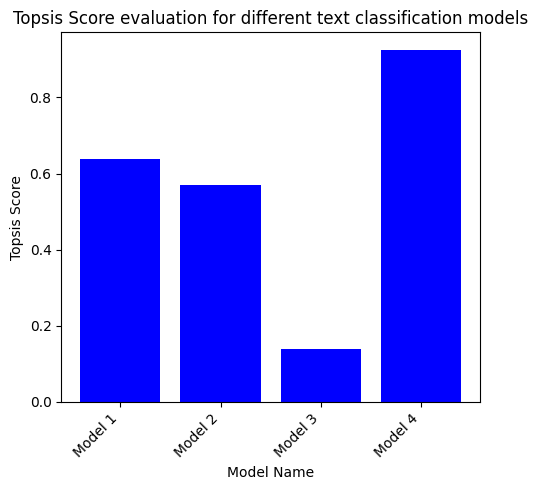

In [28]:
model_names = result1['Model']
topsis_scores = result1['Topsis Score']

# Plotting the bar graph
plt.figure(figsize=(5,5))
plt.bar(model_names, topsis_scores, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Topsis Score')
plt.title('Topsis Score evaluation for different text classification models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

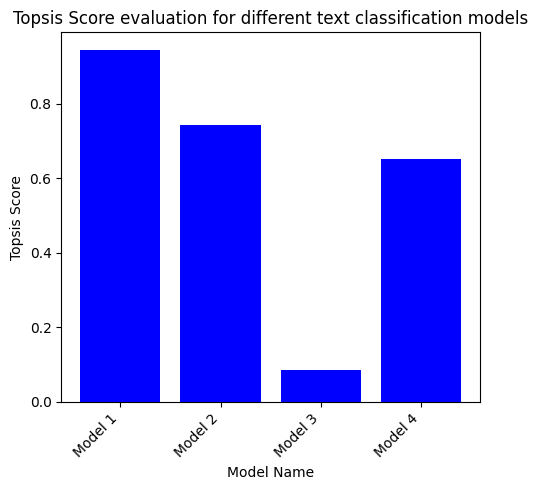

In [29]:
model_names = result2['Model']
topsis_scores = result2['Topsis Score']

# Plotting the bar graph
plt.figure(figsize=(5,5))
plt.bar(model_names, topsis_scores, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Topsis Score')
plt.title('Topsis Score evaluation for different text classification models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

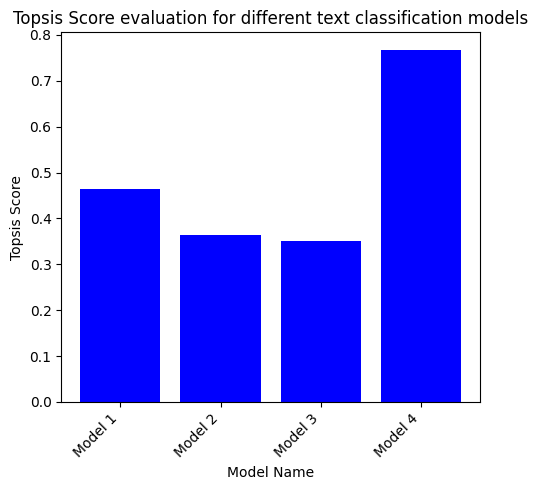

In [30]:
model_names = result3['Model']
topsis_scores = result3['Topsis Score']

# Plotting the bar graph
plt.figure(figsize=(5,5))
plt.bar(model_names, topsis_scores, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Topsis Score')
plt.title('Topsis Score evaluation for different text classification models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

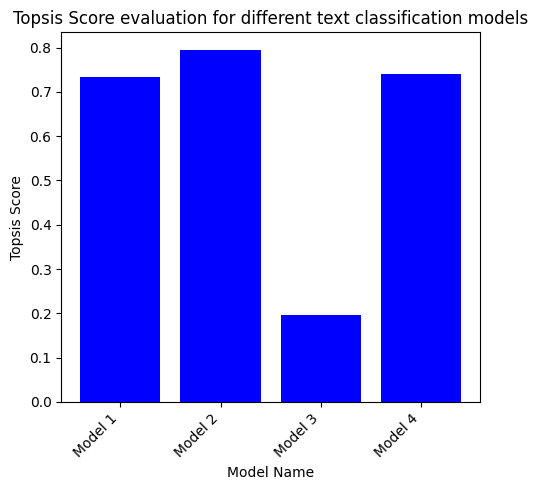

In [31]:
model_names = result4['Model']
topsis_scores = result4['Topsis Score']

# Plotting the bar graph
plt.figure(figsize=(5,5))
plt.bar(model_names, topsis_scores, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Topsis Score')
plt.title('Topsis Score evaluation for different text classification models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

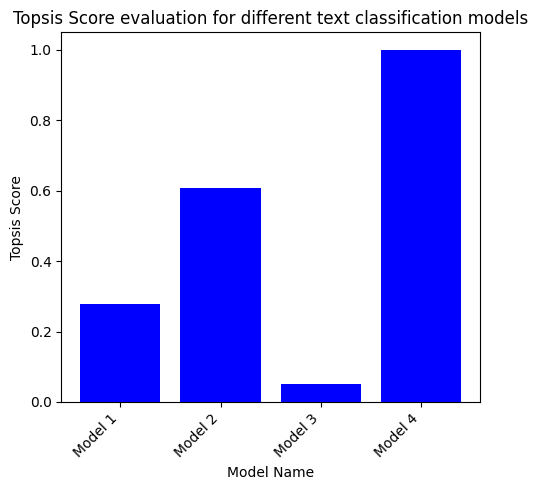

In [32]:
model_names = result5['Model']
topsis_scores = result5['Topsis Score']

# Plotting the bar graph
plt.figure(figsize=(5,5))
plt.bar(model_names, topsis_scores, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Topsis Score')
plt.title('Topsis Score evaluation for different text classification models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [33]:
# For climate dataset, Best model is model 4 (siebert/sentiment-roberta-large-english)
# For socialJustice dataset, Best model is 1 (distilbert/distilbert-base-uncased-finetuned-sst-2-english)
# For technology dataset, Best model is 4 (siebert/sentiment-roberta-large-english)
# For biodiversity dataset, Best model is 2 (lxyuan/distilbert-base-multilingual-cased-sentiments-student)
# For space dataset, Best model is 4 (siebert/sentiment-roberta-large-english)